### Learning Internal Representation by Error Propagation

- A example implementation of the following classic paper that changed the history of deep learning
>Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1985). [Learning internal representations by error propagation](http://www.cs.toronto.edu/~fritz/absps/pdp8.pdf) (No. ICS-8506). CALIFORNIA UNIV SAN DIEGO LA JOLLA INST FOR COGNITIVE SCIENCE.

#### Related Paper
- Varona-Moya, S., & Cobos, P. L. (2012, September). [Analogical inferences in the family trees task: a review. In International Conference on Artificial Neural Networks (pp. 221-228)](https://www.researchgate.net/publication/229164083_Analogical_Inferences_in_the_Family_Trees_Task_A_Review). Springer Berlin Heidelberg.
- Paccanaro, A., & Hinton, G. E. (2001). [Learning distributed representations of concepts using linear relational embedding. IEEE Transactions on Knowledge and Data Engineering](https://www.researchgate.net/publication/3296950_Learning_distributed_representations_of_concepts_using_Linear_Relational_Embedding), 13(2), 232-244.

#### Network structure

![Image of the Network](https://www.researchgate.net/profile/Sergio_Varona-Moya/publication/229164083/figure/fig2/AS:300722680811523@1448709282536/Fig-2-Architecture-of-the-perceptron.png)

#### Data Creation

In [1]:
person_1_input = [[1.0 if target == person else 0.0 for target in range(24) ] for person in range(24)]
person_2_output = person_1_input[:] # Data copy - Person 1 is the same data as person 2.

relationship_input = [[1.0 if target == relationship else 0.0 for target in range(12) ] for relationship in range(12)] 

#### Relationship Representation

In [2]:
# (colin has-father james)
# (colin has-mother victoria)
# (james has-wife victoria) 
# (charlotte has-brother colin)
# (victoria has-brother arthur)
# (charlotte has-uncle arthur) 
# 아래의 리스트는 가족관계도에 있는 관계를 위의 예시와 같은 방법으로 나타낸 것입니다.
# [input_person, relationship, output_person]

triple_relationship = [[0, 3, 1], [0, 4, 3], [0, 5, 4],
                       [1, 2, 0], [1, 4, 3], [1, 5, 4],
                       [2, 2, 3],
                       [3, 3, 2], [3, 0, 0], [3, 1, 1], [3, 9, 4], [3, 10, 10], [3, 11, 11],
                       [4, 2, 5], [4, 0, 0], [4, 1, 1], [4, 5, 3], [4, 4, 10], [4, 5, 11],
                       [5, 3, 4], [5, 0, 6], [5, 1, 7], [5, 9, 9], [5, 4, 10], [5, 5, 11],
                       [6, 3, 7], [6, 4, 5], [6, 5, 8],
                       [7, 2, 6], [7, 4, 5], [7, 5, 8],
                       [8, 2, 9], [8, 0, 6], [8, 1, 7], [8, 8, 5], [8, 10, 10], [8, 11, 11],
                       [9, 3, 8],
                       [10, 0, 5], [10, 1, 4], [10, 9, 11], [10, 6, 3], [10, 7, 8],
                       [11, 0, 5], [11, 1, 4], [11, 8, 10], [11, 6, 3], [11, 7, 8],
                       [12, 3, 13], [12, 4, 15], [12, 5, 16],
                       [13, 2, 12], [13, 4, 15], [13, 5, 16],
                       [14, 2, 15],
                       [15, 3, 14], [15, 0, 12], [15, 1, 13], [15, 9, 16], [15, 10, 22], [15, 11, 23],
                       [16, 2, 17], [16, 0, 12], [16, 1, 15], [16, 5, 15], [16, 4, 22], [16, 5, 23],
                       [17, 3, 16], [17, 0, 18], [17, 1, 19], [17, 9, 21], [17, 4, 22], [17, 5, 23],
                       [18, 3, 19], [18, 4, 17], [18, 5, 20],
                       [19, 2, 18], [19, 4, 17], [19, 5, 20],
                       [20, 2, 21], [20, 0, 18], [20, 1, 19], [20, 8, 17], [20, 10, 22], [8, 11, 23],
                       [21, 3, 20],
                       [22, 0, 17], [22, 1, 16], [22, 9, 23], [22, 6, 15], [22, 7, 20],
                       [23, 0, 17], [23, 1, 16], [23, 8, 22], [23, 6, 15], [23, 7, 20]]

#### Code

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
x1_data = np.array([person_1_input[data[0]] for  data in triple_relationship],dtype=np.float32)
x2_data = np.array([relationship_input[data[1]] for  data in triple_relationship],dtype=np.float32)
y_data = np.array([person_2_output[data[2]] for  data in triple_relationship],dtype=np.float32)

In [5]:
X1 = tf.placeholder(tf.float32, [None, 24])
X2 = tf.placeholder(tf.float32, [None, 12])
Y = tf.placeholder(tf.float32, [None, 24])

In [81]:
# Weights and bias
W11 = tf.Variable(tf.zeros([24, 6]))
W12 = tf.Variable(tf.zeros([12, 6]))
W21 = tf.Variable(tf.zeros([6, 12]))
W22 = tf.Variable(tf.zeros([6, 12]))
W3 = tf.Variable(tf.zeros([12, 24]))

b11 = tf.Variable(tf.zeros([6]))
b12 = tf.Variable(tf.zeros([6]))
b2 = tf.Variable(tf.zeros([12]))
b3 = tf.Variable(tf.zeros([24]))

# Hypothesis
L11 = tf.sigmoid(tf.matmul(X1, W11) + b11) # 24 by 6 mat
L12 = tf.sigmoid(tf.matmul(X2, W12) + b12) # 12 by 6 mat

# L2 = tf.sigmoid(tf.matmul(L11, W21) + tf.matmul(L12, W22) + b2) # Dimensions must be equal, but are 24 and 12 for 'add_22' (op: 'Add') with input shapes: [24,12], [12,12].
L2 = tf.sigmoid(tf.matmul(L11, W21) + tf.matmul(L12, W22) + b2)
hypothesis = tf.nn.softmax(tf.matmul(L2, W3) + b3)

# Minimize cost.
a = tf.Variable(0.01)
# cost = tf.reduce_mean(hypothesis, Y)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), reduction_indices=1))

train_step = tf.train.AdamOptimizer(a).minimize(cost)

# Initializa all variables.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Loop
for i in range(1000):
    sess.run(train_step, feed_dict={
            X1: x1_data, 
            X2: x2_data,
            Y:y_data}
            )
    if i % 100 == 0:
        print(
                i, 
                sess.run(cost, feed_dict={X1:x1_data, X2:x2_data, Y:y_data})
        )

0 3.15279
100 2.87883
200 2.50568
300 2.37889
400 2.18458
500 1.93348
600 1.35189
700 0.927482
800 0.729025
900 0.598082


In [82]:
correct_prediction = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


print(sess.run(accuracy, feed_dict={X1: x1_data, X2: x2_data, Y:y_data}))
print(sess.run(tf.argmax(hypothesis,1), feed_dict={X1: x1_data, X2: x2_data, Y:y_data}))
print(sess.run(tf.argmax(Y,1), feed_dict={X1: x1_data, X2: x2_data, Y:y_data}))

0.916667
[ 1  3  4  0  3  4  3  3  0  1  4 10 11  5  0  1 11 10 11  4  6  7  9 10 11
  7  5  8  6  5  8  9  6  7  5 10 11 20  5  4 11  3  8  5  4 10  3  8 13 15
 16 12 15 16 15 16 12 13 16 22 23 17 12 12 10 22 10 16 18 19 21 22 23 19 17
 20 18 17 20 21 18 19 17 22 11 20 17 16 23 15 20 17 16 22 15 20]
[ 1  3  4  0  3  4  3  2  0  1  4 10 11  5  0  1  3 10 11  4  6  7  9 10 11
  7  5  8  6  5  8  9  6  7  5 10 11  8  5  4 11  3  8  5  4 10  3  8 13 15
 16 12 15 16 15 14 12 13 16 22 23 17 12 15 15 22 23 16 18 19 21 22 23 19 17
 20 18 17 20 21 18 19 17 22 23 20 17 16 23 15 20 17 16 22 15 20]


In [93]:
print()
data = sess.run(W11, feed_dict={X1: x1_data, X2: x2_data, Y:y_data})
data = data.transpose()
data.shape

(6, 24)

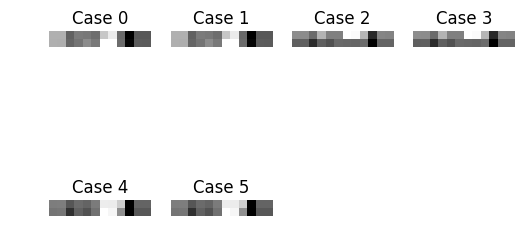

In [94]:
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

for index, values in enumerate(data):
    plt.subplot(2, 4, index + 1)
    values.shape = (2,12)
    plt.axis('off')
    plt.imshow(values, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Case %i' % index)